# CS 6140 Machine Learning: Assignment - 2 (Total Points: 100)
## Prof. Ahmad Uzair





## Question 1 - Support Vector Machine and MLP  (30 points)



 In this problem you will be applying Support Vector Machine and Multi layer perceptron for binary classification.



You will train and test Support Vector Machine (SVM) and Multi-layer Perceptron (MLP) classifiers that aim for minimum probability of classification error. You may use any standard library of your choice. The SVM should use a Gaussian (radial-basis) kernel. The MLP should be a single-hidden layer model with your choice of activation functions for all perceptrons.

Generate 1000 independent and identically distributed (iid) samples for training and 5000 iid samples for testing. All data for class L ∈ {0, 1}, which are equiprobable and two dimensional, should be generated as follows:


x = r<sub>L</sub> * [cos(θ) sin(θ)]<sup>T</sup> + n

where,

 θ ∼ Uniform[−π, π],

 n ∼ N(0, σ<sup>2</sup>I), Note: N represents the Gaussian distribution 

 r<sub>0</sub> = 2, r<sub>1</sub> = 4, σ = 1


Note: The two class sample sets will be highly overlapping two concentric disks, and due to angular symmetry, we anticipate the best classification boundary to be a circle between the two disks. Your SVM and MLP models will try to approximate it.

Use the training data with 10-fold cross-validation to determine the best hyperparameters (box constraints parameter and Gaussian kernel width for the SVM, number of perceptrons in the hidden layer for the MLP). Once these hyperparameters are set, train your final SVM and MLP classifier using the entire training data set. Apply your trained SVM and MLP classifiers to the test data set and estimate the probability of error from this data set.

Show the following: 

(1) visual and numerical demonstrations of the K-fold cross-validation process indicating how the hyperparameters for SVM and MLP classifiers are set.

(2) visual and numerical demonstrations of the performance of your SVM and MLP classifiers on the test dataset.


Hint: For hyperparameter selection, you may show the performance estimates for various choices and indicate where the best result is achieved. For test performance, you may show the data and classification boundary superimposed, along with an estimated probability of error from the samples.


In [16]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [17]:
random.seed(8)

random_n = np.random.multivariate_normal([0, 0], np.identity(2), 6000)
random_theta = np.random.uniform(-np.pi, np.pi, 6000)
random_labels = np.random.randint(2, size = 6000)

fea = []
for i in range(6000):
    if random_labels[i] == 0:
        x = 2 * np.array([np.cos(random_theta[i]), np.sin(random_theta[i])]).T + random_n[i]
    else:
        x = 4 * np.array([np.cos(random_theta[i]), np.sin(random_theta[i])]).T + random_n[i]
    fea.append(x)

data = np.concatenate((np.array(fea), np.array([random_labels]).T), axis = 1)

df = pd.DataFrame(data, columns = ['x0', 'x1', 'Label'])

x_train, x_test, y_train, y_test = model_selection.train_test_split(df.iloc[:, : 2], df.iloc[:, 2], shuffle = False, train_size = 1000)

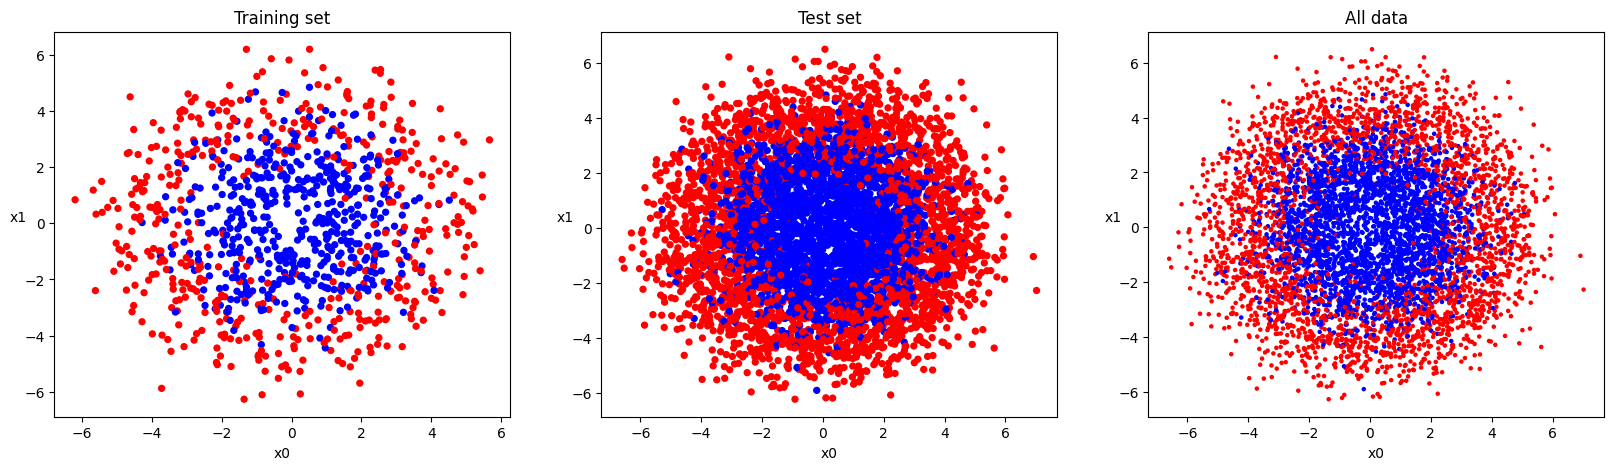

In [18]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5))
ax1.scatter(x_train['x0'], x_train['x1'], s = 18, c = y_train.map(lambda t: 'r' if t == 1 else 'b'))
ax1.set_title('Training set')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1', rotation='horizontal')

ax2.scatter(x_test['x0'], x_test['x1'], s = 18, c = y_test.map(lambda t: 'r' if t == 1 else 'b'))
ax2.set_title('Test set')
ax2.set_xlabel('x0')
ax2.set_ylabel('x1', rotation='horizontal')

ax3.scatter(df['x0'], df['x1'], s = 5, c = df['Label'].map(lambda t: 'r' if t == 1 else 'b'))
ax3.set_title('All data')
ax3.set_xlabel('x0')
ax3.set_ylabel('x1', rotation='horizontal')

fig1.show()

## (1). Select Hyperparameters

In [19]:
def svc_param_selection(x_, y_, k_folds = 10):
    cs = [0.1, 1, 10, 20]
    gammas = [0.1, 1, 2, 4, 6, 8, 10]
    param_grid = {'C': cs, 'gamma': gammas}
    grid_search = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv = k_folds)
    grid_search.fit(x_, y_)

    params = list(zip(grid_search.cv_results_['params'], list(grid_search.cv_results_['mean_test_score'])))
    for i in sorted(params, key = lambda x: x[1], reverse = True):
        print(i)

    return grid_search.best_params_, grid_search.best_score_, params

def mlp_param_selection(x_, y_, k_folds = 10):
    hidden_units = []
    for i in range(1, 26):
        hidden_units.append((i, ))
    param_grid = {'hidden_layer_sizes': hidden_units, 'max_iter': [2000]}
    grid_search = model_selection.GridSearchCV(MLPClassifier(), param_grid, cv = k_folds, refit = 'accuracy_score')
    grid_search.fit(x_, y_)

    params = list(zip(grid_search.cv_results_['params'], list(grid_search.cv_results_['mean_test_score'])))
    for i in sorted(params, key = lambda x: x[1], reverse = True):
        print(i)

    return grid_search.best_params_, grid_search.best_score_, params

#### Numerical results from hyperparameters of SVM

In [20]:
best_params_svm, best_score_svm, params_svm = svc_param_selection(x_train, y_train, 10)
print('Best Parameters for SVM: ', best_params_svm, end = '')
print(': ', best_score_svm)

({'C': 0.1, 'gamma': 1}, 0.8240000000000001)
({'C': 0.1, 'gamma': 0.1}, 0.8230000000000001)
({'C': 10, 'gamma': 0.1}, 0.8230000000000001)
({'C': 20, 'gamma': 0.1}, 0.8230000000000001)
({'C': 1, 'gamma': 1}, 0.8229999999999998)
({'C': 1, 'gamma': 0.1}, 0.821)
({'C': 0.1, 'gamma': 2}, 0.8150000000000001)
({'C': 1, 'gamma': 2}, 0.8150000000000001)
({'C': 10, 'gamma': 1}, 0.8089999999999999)
({'C': 0.1, 'gamma': 4}, 0.807)
({'C': 20, 'gamma': 1}, 0.806)
({'C': 1, 'gamma': 4}, 0.804)
({'C': 1, 'gamma': 6}, 0.7929999999999999)
({'C': 10, 'gamma': 2}, 0.7919999999999999)
({'C': 1, 'gamma': 8}, 0.7869999999999999)
({'C': 1, 'gamma': 10}, 0.779)
({'C': 20, 'gamma': 2}, 0.7710000000000001)
({'C': 10, 'gamma': 4}, 0.7550000000000001)
({'C': 10, 'gamma': 6}, 0.7470000000000001)
({'C': 10, 'gamma': 8}, 0.744)
({'C': 10, 'gamma': 10}, 0.741)
({'C': 20, 'gamma': 4}, 0.74)
({'C': 0.1, 'gamma': 6}, 0.7390000000000001)
({'C': 20, 'gamma': 6}, 0.735)
({'C': 20, 'gamma': 8}, 0.735)
({'C': 20, 'gamma': 10}

#### Visual results from hyperparameters of SVM

In [21]:
def get_degree_gamma():
    C = []
    gamma = [[], [], [], []]
    sc = [[], [], [], []]
    for param, score in params_svm:
        if param['C'] == 0.1:
            gamma[0].append(param['gamma'])
            sc[0].append(score)
        elif param['C'] == 1:
            gamma[1].append(param['gamma'])
            sc[1].append(score)
        elif param['C'] == 10:
            gamma[2].append(param['gamma'])
            sc[2].append(score)
        elif param['C'] == 20:
            gamma[3].append(param['gamma'])
            sc[3].append(score)
    return np.array(C), np.array(gamma), np.array(sc)

svm_C, svm_gamma, svm_score = get_degree_gamma()

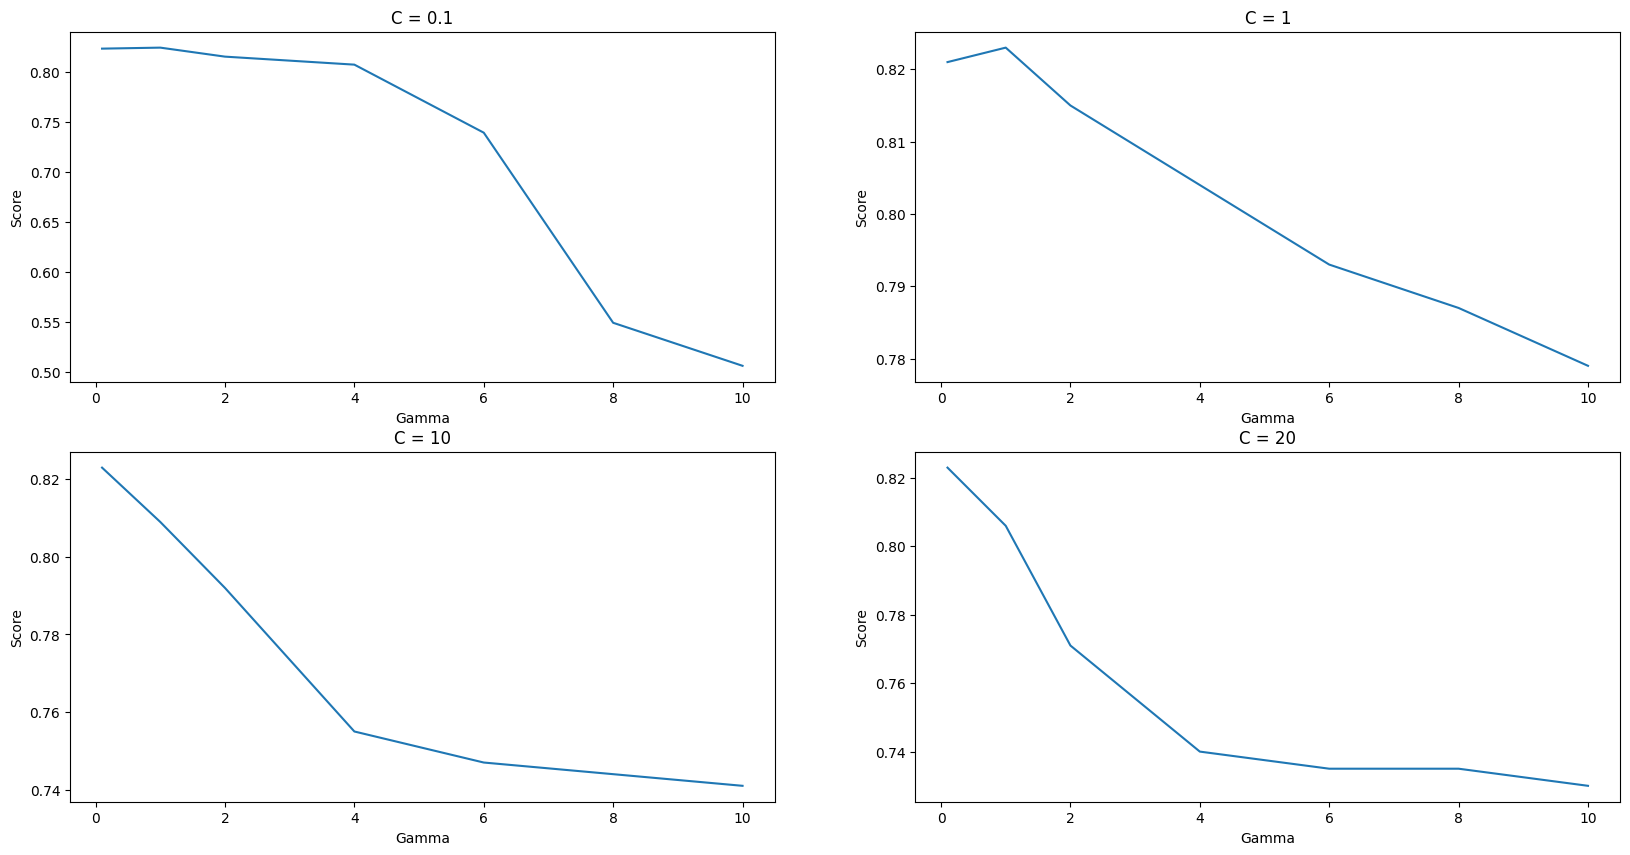

In [22]:
fig2, axes = plt.subplots(2, 2, figsize = (20, 10))

axes[0, 0].plot(svm_gamma[0], svm_score[0])
axes[0, 0].set_title('C = 0.1')
axes[0, 0].set_xlabel('Gamma')
axes[0, 0].set_ylabel('Score')

axes[0, 1].plot(svm_gamma[1], svm_score[1])
axes[0, 1].set_title('C = 1')
axes[0, 1].set_xlabel('Gamma')
axes[0, 1].set_ylabel('Score')

axes[1, 0].plot(svm_gamma[2], svm_score[2])
axes[1, 0].set_title('C = 10')
axes[1, 0].set_xlabel('Gamma')
axes[1, 0].set_ylabel('Score')

axes[1, 1].plot(svm_gamma[3], svm_score[3])
axes[1, 1].set_title('C = 20')
axes[1, 1].set_xlabel('Gamma')
axes[1, 1].set_ylabel('Score')

fig2.show()

#### Numerical results from hyperparameters of MLP

In [23]:
best_params_mlp, best_score_mlp, params_mlp = mlp_param_selection(x_train, y_train, 10)
print('Best Parameters for MLP: ', best_params_mlp, end = '')
print(': ', best_score_mlp)

({'hidden_layer_sizes': (22,), 'max_iter': 2000}, 0.8320000000000001)
({'hidden_layer_sizes': (10,), 'max_iter': 2000}, 0.8290000000000001)
({'hidden_layer_sizes': (20,), 'max_iter': 2000}, 0.8290000000000001)
({'hidden_layer_sizes': (12,), 'max_iter': 2000}, 0.829)
({'hidden_layer_sizes': (19,), 'max_iter': 2000}, 0.829)
({'hidden_layer_sizes': (23,), 'max_iter': 2000}, 0.829)
({'hidden_layer_sizes': (24,), 'max_iter': 2000}, 0.8280000000000001)
({'hidden_layer_sizes': (21,), 'max_iter': 2000}, 0.826)
({'hidden_layer_sizes': (25,), 'max_iter': 2000}, 0.826)
({'hidden_layer_sizes': (11,), 'max_iter': 2000}, 0.8230000000000001)
({'hidden_layer_sizes': (7,), 'max_iter': 2000}, 0.8220000000000001)
({'hidden_layer_sizes': (8,), 'max_iter': 2000}, 0.8220000000000001)
({'hidden_layer_sizes': (14,), 'max_iter': 2000}, 0.8210000000000001)
({'hidden_layer_sizes': (17,), 'max_iter': 2000}, 0.8210000000000001)
({'hidden_layer_sizes': (16,), 'max_iter': 2000}, 0.821)
({'hidden_layer_sizes': (13,),

#### Visual results from hyperparameters of MLP

In [24]:
def get_hidden_units():
    units = []
    acc = []
    for param, a in params_mlp:
        units.append(param['hidden_layer_sizes'][0])
        acc.append(a)

    return np.array(units), np.array(acc)

mlp_units, mlp_acc = get_hidden_units()

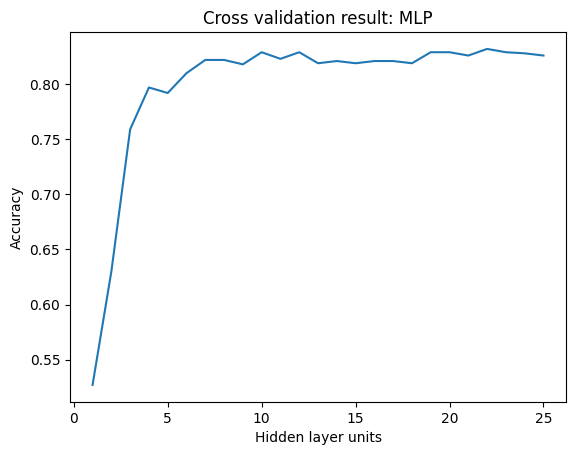

In [25]:
fig3 = plt.figure()
plt.plot(mlp_units, mlp_acc)
plt.title('Cross validation result: MLP')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
fig3.show()

## (2). Performance

In [26]:
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)

#### Performance of SVM on test set

Epochs: 50		Acc: 0.5744		MSE: 0.4256
Epochs: 100		Acc: 0.7296		MSE: 0.2704
Epochs: 150		Acc: 0.7560		MSE: 0.2440
Epochs: 200		Acc: 0.8282		MSE: 0.1718
Epochs: 250		Acc: 0.8340		MSE: 0.1660
Epochs: 300		Acc: 0.8356		MSE: 0.1644
Epochs: 350		Acc: 0.8356		MSE: 0.1644
Epochs: 400		Acc: 0.8352		MSE: 0.1648
Epochs: 450		Acc: 0.8356		MSE: 0.1644
Epochs: 500		Acc: 0.8352		MSE: 0.1648
Epochs: 550		Acc: 0.8352		MSE: 0.1648
Epochs: 600		Acc: 0.8352		MSE: 0.1648
Epochs: 650		Acc: 0.8352		MSE: 0.1648
Epochs: 700		Acc: 0.8352		MSE: 0.1648
Epochs: 750		Acc: 0.8352		MSE: 0.1648
Epochs: 800		Acc: 0.8352		MSE: 0.1648
Epochs: 850		Acc: 0.8352		MSE: 0.1648
Epochs: 900		Acc: 0.8352		MSE: 0.1648
Epochs: 950		Acc: 0.8352		MSE: 0.1648
Epochs: 1000		Acc: 0.8352		MSE: 0.1648


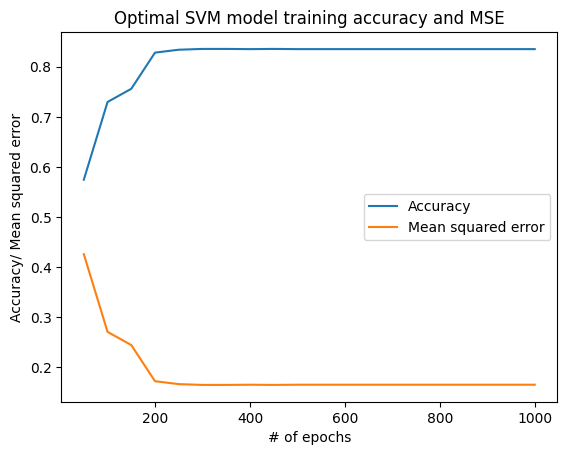

In [27]:
svm_epochs = []
svm_accs = []
svm_mses = []
for e in range(50, 1001, 50):
    svm_clf = svm.SVC(kernel = 'rbf', C = best_params_svm['C'], gamma = best_params_svm['gamma'], max_iter = e)
    svm_clf.fit(x_train, y_train)
    y_pred_svm = svm_clf.predict(x_test)
    svm_acc = metrics.accuracy_score(y_pred_svm, y_test)
    svm_mse = metrics.mean_squared_error(y_pred_svm, y_test)

    svm_epochs.append(e)
    svm_accs.append(svm_acc)
    svm_mses.append(svm_mse)
    print('Epochs: %s\t\tAcc: %.4f\t\tMSE: %.4f' % (e, svm_acc, svm_mse))

fig4 = plt.figure()

plt.title('Optimal SVM model training accuracy and MSE')
plt.xlabel('# of epochs')
plt.ylabel('Accuracy/ Mean squared error')
plt.plot(svm_epochs, svm_accs, label = 'Accuracy')
plt.plot(svm_epochs, svm_mses, label = 'Mean squared error')
plt.legend()

fig4.show()

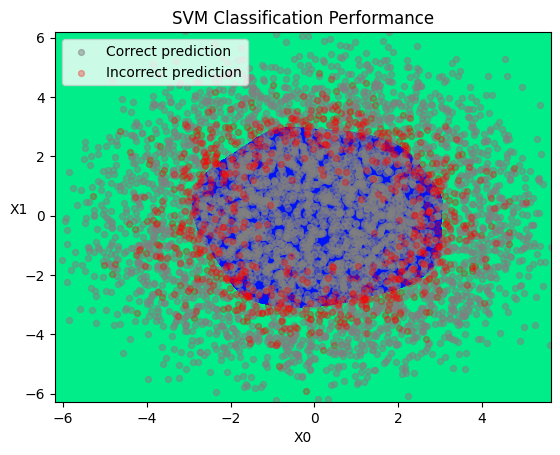

In [28]:
svm_clf = svm.SVC(kernel = 'rbf', C = best_params_svm['C'], gamma = best_params_svm['gamma'], max_iter = 2000).fit(x_train, y_train)
svm_prediction = plt.figure()

svm_x_min, svm_x_max = x_train['x0'].min(), x_train['x0'].max()
svm_y_min, svm_y_max = x_train['x1'].min(), x_train['x1'].max()
svm_xx, svm_yy = np.meshgrid(np.arange(svm_x_min, svm_x_max, 0.02), np.arange(svm_y_min, svm_y_max, 0.02))

svm_y_pred = svm_clf.predict(x_test)
svm_y_p = svm_clf.predict(np.c_[svm_xx.ravel(), svm_yy.ravel()])
svm_y_p = svm_y_p.reshape(svm_xx.shape)

svm_corr_x0 = []
svm_corr_x1 = []
svm_incorr_x0 = []
svm_incorr_x1 = []
for x, y, y_p in zip(np_x_test, np_y_test, svm_y_pred):
    if y == y_p:
        svm_corr_x0.append(x[0])
        svm_corr_x1.append(x[1])
    else:
        svm_incorr_x0.append(x[0])
        svm_incorr_x1.append(x[1])

plt.contourf(svm_xx, svm_yy, svm_y_p, cmap = plt.cm.winter, alpha = 1)
plt.scatter(svm_corr_x0, svm_corr_x1, s = 18, c = 'grey', alpha = 0.5, label = 'Correct prediction')
plt.scatter(svm_incorr_x0, svm_incorr_x1, s = 18, c = 'r', alpha = 0.3, label = 'Incorrect prediction')
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1', rotation = 'horizontal')
plt.xlim(svm_xx.min(), svm_xx.max())
plt.ylim(svm_yy.min(), svm_yy.max())
plt.title('SVM Classification Performance')

svm_prediction.show()

#### Performance of MLP on test set


Epochs: 50		Acc: 0.7664		MSE: 0.2336
Epochs: 100		Acc: 0.8304		MSE: 0.1696
Epochs: 150		Acc: 0.8376		MSE: 0.1624
Epochs: 200		Acc: 0.8346		MSE: 0.1654
Epochs: 250		Acc: 0.8346		MSE: 0.1654
Epochs: 300		Acc: 0.8352		MSE: 0.1648
Epochs: 350		Acc: 0.8336		MSE: 0.1664
Epochs: 400		Acc: 0.8374		MSE: 0.1626
Epochs: 450		Acc: 0.8368		MSE: 0.1632
Epochs: 500		Acc: 0.8356		MSE: 0.1644
Epochs: 550		Acc: 0.8368		MSE: 0.1632
Epochs: 600		Acc: 0.8372		MSE: 0.1628
Epochs: 650		Acc: 0.8362		MSE: 0.1638
Epochs: 700		Acc: 0.8380		MSE: 0.1620
Epochs: 750		Acc: 0.8362		MSE: 0.1638
Epochs: 800		Acc: 0.8372		MSE: 0.1628
Epochs: 850		Acc: 0.8374		MSE: 0.1626
Epochs: 900		Acc: 0.8340		MSE: 0.1660
Epochs: 950		Acc: 0.8384		MSE: 0.1616
Epochs: 1000		Acc: 0.8362		MSE: 0.1638


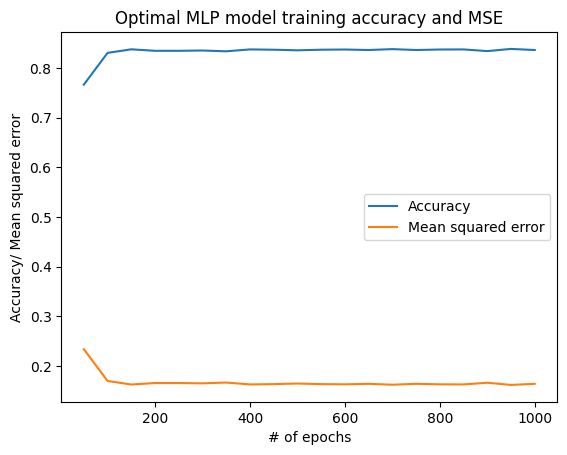

In [29]:
mlp_epochs = []
mlp_accs = []
mlp_mses = []
for e in range(50, 1001, 50):
    mlp_clf = MLPClassifier(hidden_layer_sizes = best_params_mlp['hidden_layer_sizes'], max_iter = e)
    mlp_clf.fit(x_train, y_train)
    y_pred_mlp = mlp_clf.predict(x_test)
    mlp_acc = metrics.accuracy_score(y_pred_mlp, y_test)
    mlp_mse = metrics.mean_squared_error(y_pred_mlp, y_test)

    mlp_epochs.append(e)
    mlp_accs.append(mlp_acc)
    mlp_mses.append(mlp_mse)
    print('Epochs: %s\t\tAcc: %.4f\t\tMSE: %.4f' % (e, mlp_acc, mlp_mse))

fig5 = plt.figure()

plt.title('Optimal MLP model training accuracy and MSE')
plt.xlabel('# of epochs')
plt.ylabel('Accuracy/ Mean squared error')
plt.plot(mlp_epochs, mlp_accs, label = 'Accuracy')
plt.plot(mlp_epochs, mlp_mses, label = 'Mean squared error')
plt.legend()

fig5.show()

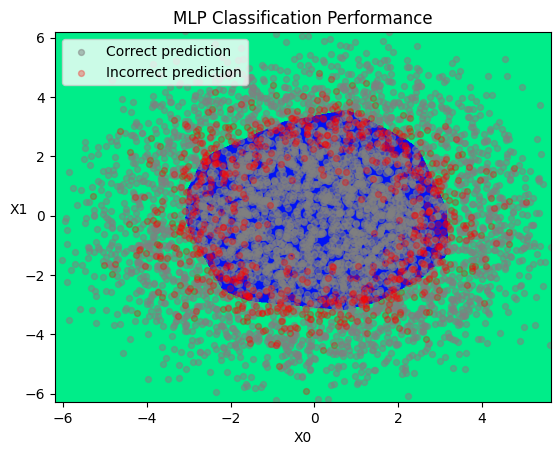

In [30]:
mlp_clf = MLPClassifier(hidden_layer_sizes = best_params_mlp['hidden_layer_sizes'], max_iter = 2000).fit(x_train, y_train)
mlp_prediction = plt.figure()

mlp_x_min, mlp_x_max = x_train['x0'].min(), x_train['x0'].max()
mlp_y_min, mlp_y_max = x_train['x1'].min(), x_train['x1'].max()
mlp_xx, mlp_yy = np.meshgrid(np.arange(mlp_x_min, mlp_x_max, 0.02), np.arange(mlp_y_min, mlp_y_max, 0.02))

mlp_y_pred = mlp_clf.predict(x_test)
mlp_y_p = mlp_clf.predict(np.c_[mlp_xx.ravel(), mlp_yy.ravel()])
mlp_y_p = mlp_y_p.reshape(mlp_xx.shape)

mlp_corr_x0 = []
mlp_corr_x1 = []
mlp_incorr_x0 = []
mlp_incorr_x1 = []
for x, y, y_p in zip(np_x_test, np_y_test, svm_y_pred):
    if y == y_p:
        mlp_corr_x0.append(x[0])
        mlp_corr_x1.append(x[1])
    else:
        mlp_incorr_x0.append(x[0])
        mlp_incorr_x1.append(x[1])

plt.contourf(mlp_xx, mlp_yy, mlp_y_p, cmap = plt.cm.winter, alpha = 1)
plt.scatter(mlp_corr_x0, mlp_corr_x1, s = 18, c = 'grey', alpha = 0.5, label = 'Correct prediction')
plt.scatter(mlp_incorr_x0, mlp_incorr_x1, s = 18, c = 'r', alpha = 0.3, label = 'Incorrect prediction')
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1', rotation = 'horizontal')
plt.xlim(mlp_xx.min(), mlp_xx.max())
plt.ylim(mlp_yy.min(), mlp_yy.max())
plt.title('MLP Classification Performance')

mlp_prediction.show()